In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# To simplify, only choose 2 features and 2 labels
X = X[y<2,:2]
y = y[y<2]
X.shape

(100, 2)

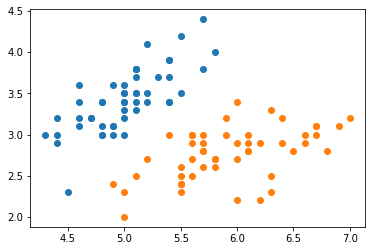

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from fun_machine_learning.model_selection import train_test_split
from fun_machine_learning.logistic_regression import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=100)
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)
logi_reg.score(X_test, y_test)

/Users/ada/Documents/coding-workspace/JupyterNotebook/fun_machine_learning/logistic_regression.py:22: RuntimeWarning: invalid value encountered in log
  return -np.sum(y*np.log(y_hat + (1-y)*np.log(1-y_hat))) / len(y)


0.95

In [5]:
logi_reg.predict_proba(X_test)

array([0.01549541, 0.99873833, 0.05818583, 0.80935908, 0.15056828,
       0.33712431, 0.14879198, 0.00435026, 0.99054667, 0.01709417,
       0.58660948, 0.98941959, 0.98090784, 0.97894592, 0.88541755,
       0.95189207, 0.99760811, 0.01528394, 0.03518985, 0.03195368])

## Decision boundry

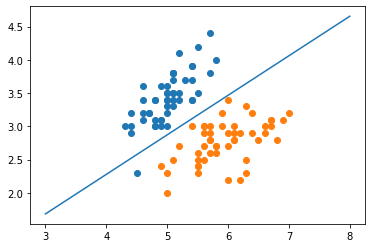

In [8]:
def x2(x1):
    return (-logi_reg.coef_[0] * x1 - logi_reg.interception_) / logi_reg.coef_[1]

x1_plot = np.linspace(3, 8, 1000)
x2_plot = x2(x1_plot)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
# Visualize the decision boundry
plt.plot(x1_plot, x2_plot)
plt.show()

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


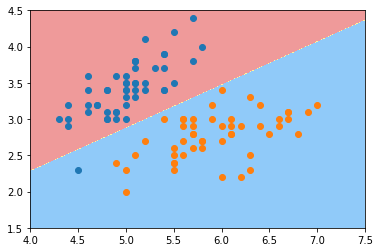

In [11]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(logi_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### Decision boundry of KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.95

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


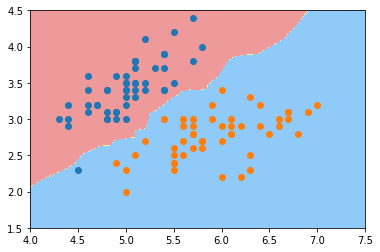

In [15]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


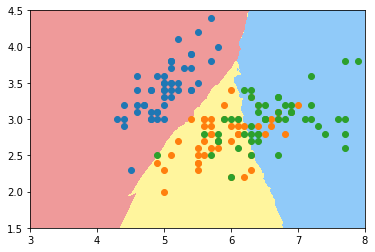

In [21]:
# Use all 3 labels
X = iris.data
y = iris.target
knn_clf2 = KNeighborsClassifier(n_neighbors=50)
knn_clf2.fit(X[:,:2], y)
plot_decision_boundary(knn_clf2, axis=[3, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()